## MOVIE RECOMMENDER

Create a Jupyter notebook (take a look at the resources if you are new to this).

Load the data files `ratings.dat`.

Answer the following questions:
1. How many users and movies are mentioned in the dataset?
2. How old are the data points (number of data points per year)?
3. How popular are popular movies (based on the data, when would you say a movie is popular)?
4. How many long-tail movies are there?
5. How many movies has each user rated?
6. If you had a recommender system that only recommended the most popular movies, how good would it be?

Write a report that answers the questions above and include charts to illustrate your answers.

In [1]:
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

### Load the data

In [2]:
df = pd.read_csv('../data/ratings.dat', sep = '::', names = ['user_id', 'movie_id', 'rating', 'rating_timestamp'], engine = 'python')
df.head()

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524


---------------------------

### Time to answer the questions

#### 1. How many users and movies are mentioned in the dataset?

In [3]:
unique_users = df['user_id'].nunique()
unique_movies = df['movie_id'].nunique()
print(f'Unique number of users {unique_users} rating {unique_movies} unique movies')

Unique number of users 71707 rating 38013 unique movies


#### 2. How old are the data points (number of data points per year)?

In [4]:
# Let's create a readable column for dates
df['rating_datetime'] = [datetime.fromtimestamp(x) for x in df['rating_timestamp']]
df.head()

,user_id,movie_id,rating,rating_timestamp,rating_datetime
0,1,114508,8,1381006850,2013-10-05 23:00:50
1,2,499549,9,1376753198,2013-08-17 17:26:38
2,2,1305591,8,1376742507,2013-08-17 14:28:27
3,2,1428538,1,1371307089,2013-06-15 16:38:09
4,3,75314,1,1595468524,2020-07-23 03:42:04


<AxesSubplot:xlabel='Year', ylabel='Number of reviews'>

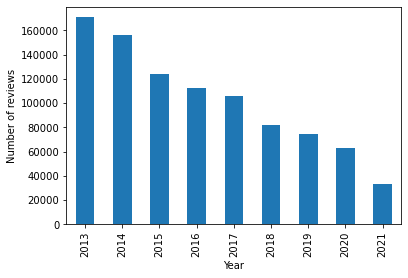

In [5]:
df.groupby(df['rating_datetime'].dt.year)['rating'].count().plot(kind = 'bar', xlabel = 'Year', ylabel = 'Number of reviews')


In [6]:
df.groupby(df['rating_datetime'].dt.year)['rating'].count()

rating_datetime
2013    170779
2014    156367
2015    123634
2016    112461
2017    105993
2018     81862
2019     74193
2020     63126
2021     32983
Name: rating, dtype: int64

#### 3. How popular are popular movies (based on the data, when would you say a movie is popular)?

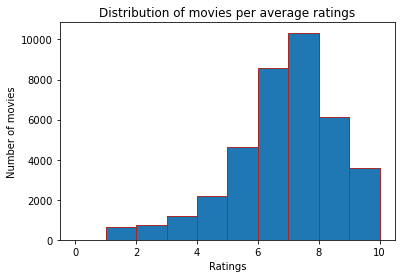

In [7]:
avg_ratings_movies = df[['movie_id', 'rating']].groupby('movie_id').mean()
plt.hist(avg_ratings_movies, edgecolor = 'brown', bins = 10)
plt.xlabel('Ratings')
plt.ylabel('Number of movies')
plt.title('Distribution of movies per average ratings')
plt.show()

#### 4. How many long-tail movies are there?

In [8]:
avg_ratings_movies['rating'].value_counts(bins = 10).sort_index(ascending = True)

(-0.011, 1.0]     583
(1.0, 2.0]        643
(2.0, 3.0]        993
(3.0, 4.0]       1610
(4.0, 5.0]       3227
(5.0, 6.0]       6120
(6.0, 7.0]       9453
(7.0, 8.0]       9359
(8.0, 9.0]       3895
(9.0, 10.0]      2130
Name: rating, dtype: int64

In [9]:
avg_ratings_movies['rating'].value_counts(bins = 10).sort_index(ascending = True)[1:5].sum() # get movies from the first five bins

6473

#### 5. How many movies has each user rated?

In [10]:
user_no_ratings = df[['user_id', 'rating']].groupby('user_id').count().value_counts()

(0.0, 50.0)

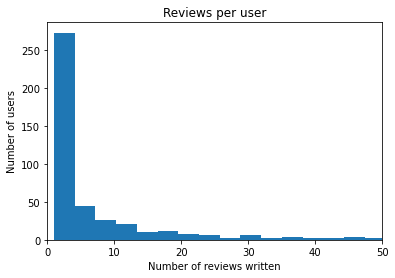

In [11]:
plt.hist(user_no_ratings, bins = 10000) 
plt.title('Reviews per user')
plt.xlabel('Number of reviews written')
plt.ylabel('Number of users')
plt.xlim(0, 50) ## Reducing number of 